# Problem Statement
    The prediction task is to determine whether a person makes over 50K a year. Explain the
    performance of the model using accuracy, AUROC curve and confusion matrix. Feel free
    to add any other metric you see fit.
    Perform a segmentation study on the dataset to display useful information using any
    visualization library.

# Prepare notebook

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score 

# Data Extraction and Loading

In [2]:
from pandas import read_csv
filename1 = 'data/au_train.csv'
filename2 = 'data/au_test.csv'

train_set = read_csv(filename1, skipinitialspace=True) # skipinitial=True to remove extra spaces in the data set.
test_set  = read_csv(filename2, skipinitialspace=True) # Bu default it is False
train_set.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


# Exploratory Data Analysis
Look at the data before preprocessing

In [3]:
train_set.info()
print ()
print ('train size:', train_set.shape)
print ('test size:', test_set.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
class             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

train size: (32561, 15)
test size: (16281, 15)


* The dataaset has both numerical as well as categorical variables. Age, fnlwgt, education-num, capital-gain, capital-loss and hours-per-week are numerical and the rest are categorical variables.
* All of these variables do not have any null values.


In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
class             16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


* The test set also don't have any null values. 

In [50]:
test_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


* Data consists of 8 categorical variables, one target which is also non numeric and 6 numerical features.
* There are no missing values in the train data set. However "?" are present in test set.

In [6]:
# Since the test set has "?", let's check which columns in train set has similar values if any.
train_set.isin(['?']).any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
class             False
dtype: bool

In [7]:
test_set.isin(['?']).any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
class             False
dtype: bool

Three columns, 'workclass', 'occupation' and native-country' in  both train_set and test_set have ' ?' as values.

## Visualizations

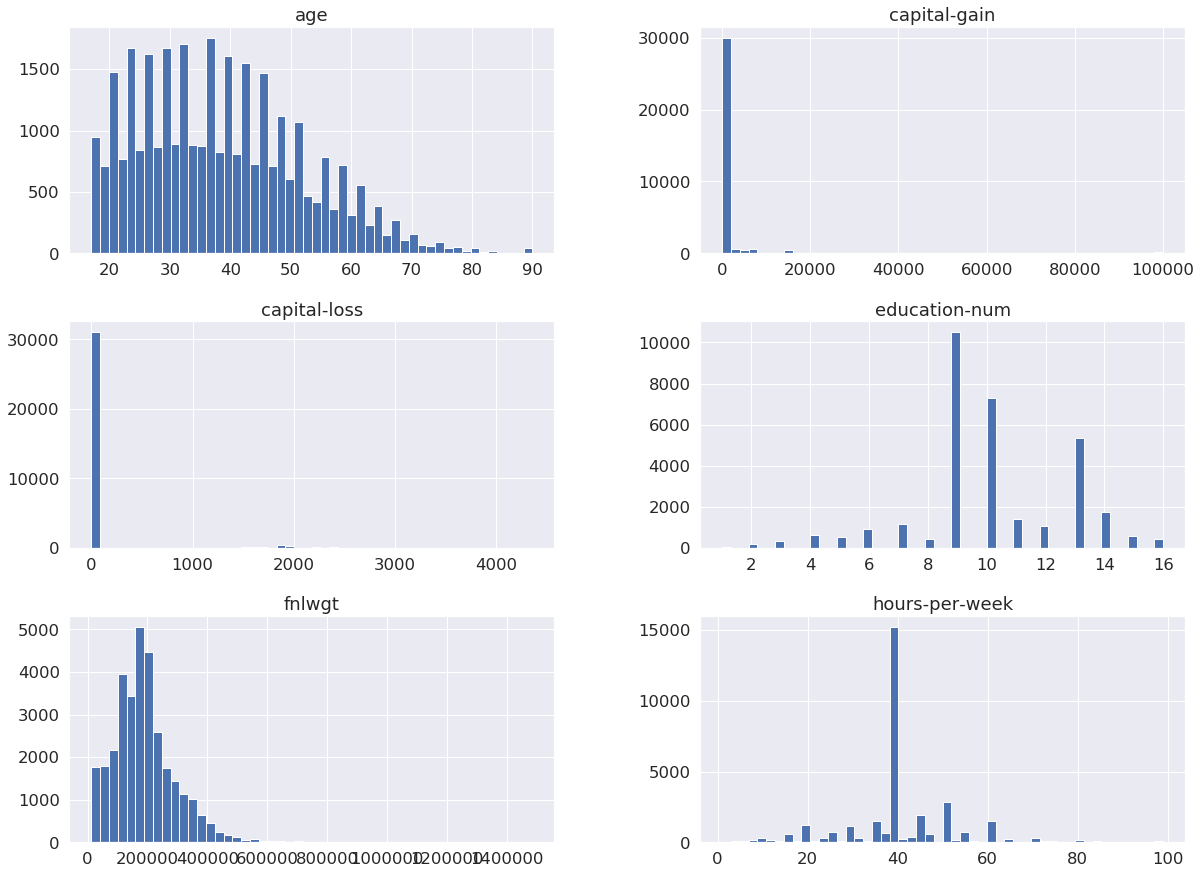

In [130]:
# Let's run histograms to see the distribution of numerical features

%matplotlib inline
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
plt.show()

Text(0,0.5,'Frequency')

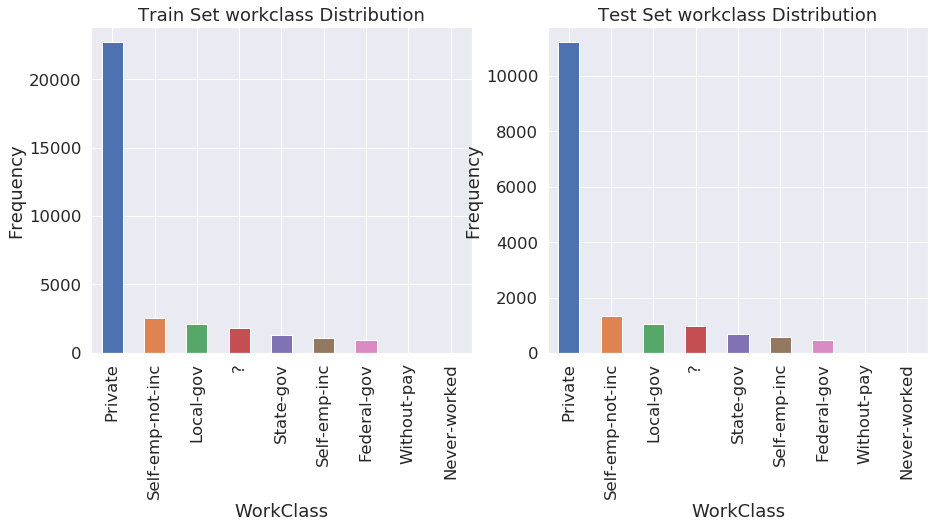

In [14]:
# distribution workclass categories in train and tes data
# this also shows unique values for each categorical feature in the data set

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Train Set workclass Distribution')
pd.value_counts(train_set['workclass']).plot.bar()
plt.xlabel('WorkClass')
plt.ylabel('Frequency')

plt.subplot(122)
plt.title('Test Set workclass Distribution')
pd.value_counts(test_set['workclass']).plot.bar()   
plt.xlabel('WorkClass')
plt.ylabel('Frequency')

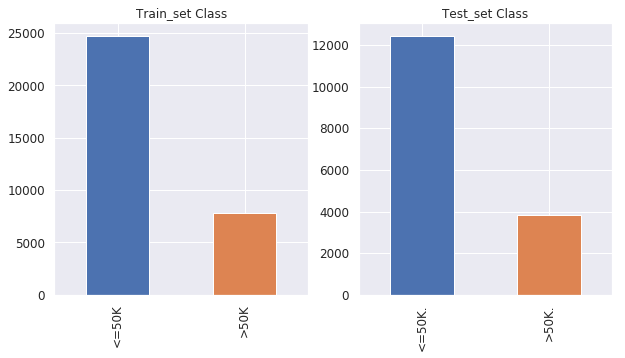

In [15]:
# class distribution in train and test set

plt.figure(figsize=(10,5))
sns.set()
plt.subplot(121)
plt.title('Train_set Class')
pd.value_counts(train_set['class']).plot.bar(fontsize= 12)

plt.subplot(122)

plt.title('Test_set Class')
pd.value_counts(test_set['class']).plot.bar(fontsize= 12)

Distribution of target variable 'class' is uneven for both train and test set, meaning class <=50K consists of above 70 percent while class >50K is about 30 percent.

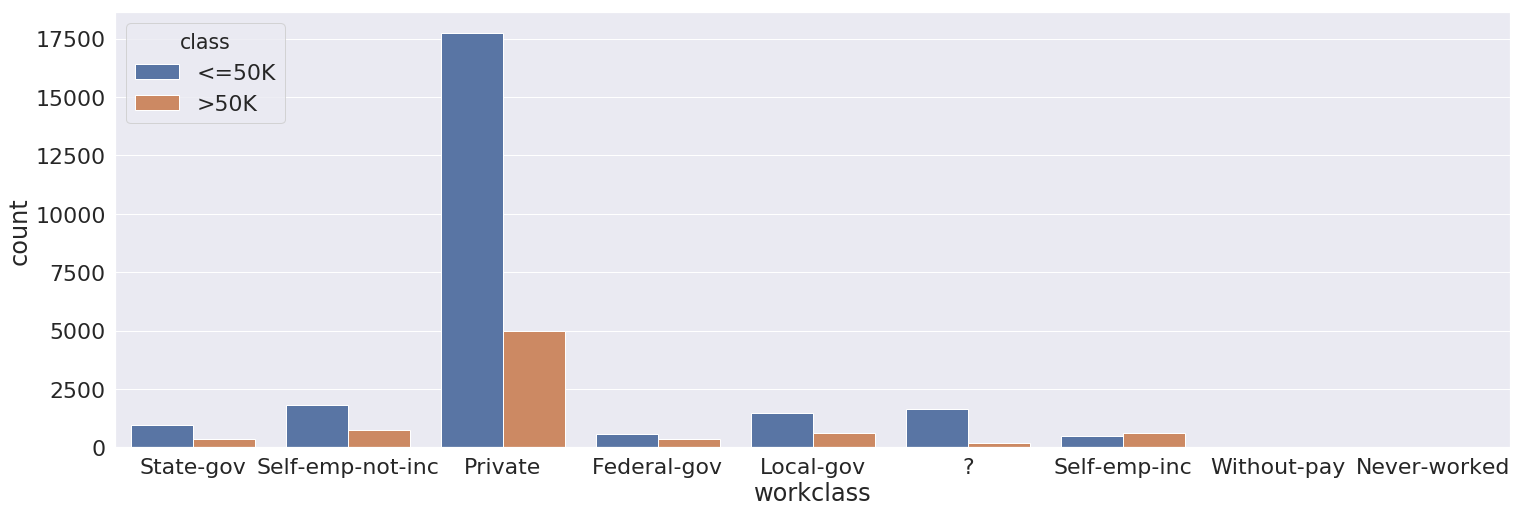

In [16]:
plt.figure(figsize=(25,8))
sns.set(font_scale = 2)
ax = sns.countplot(x="workclass", hue="class", data=train_set)

There are more people with Private workclass.

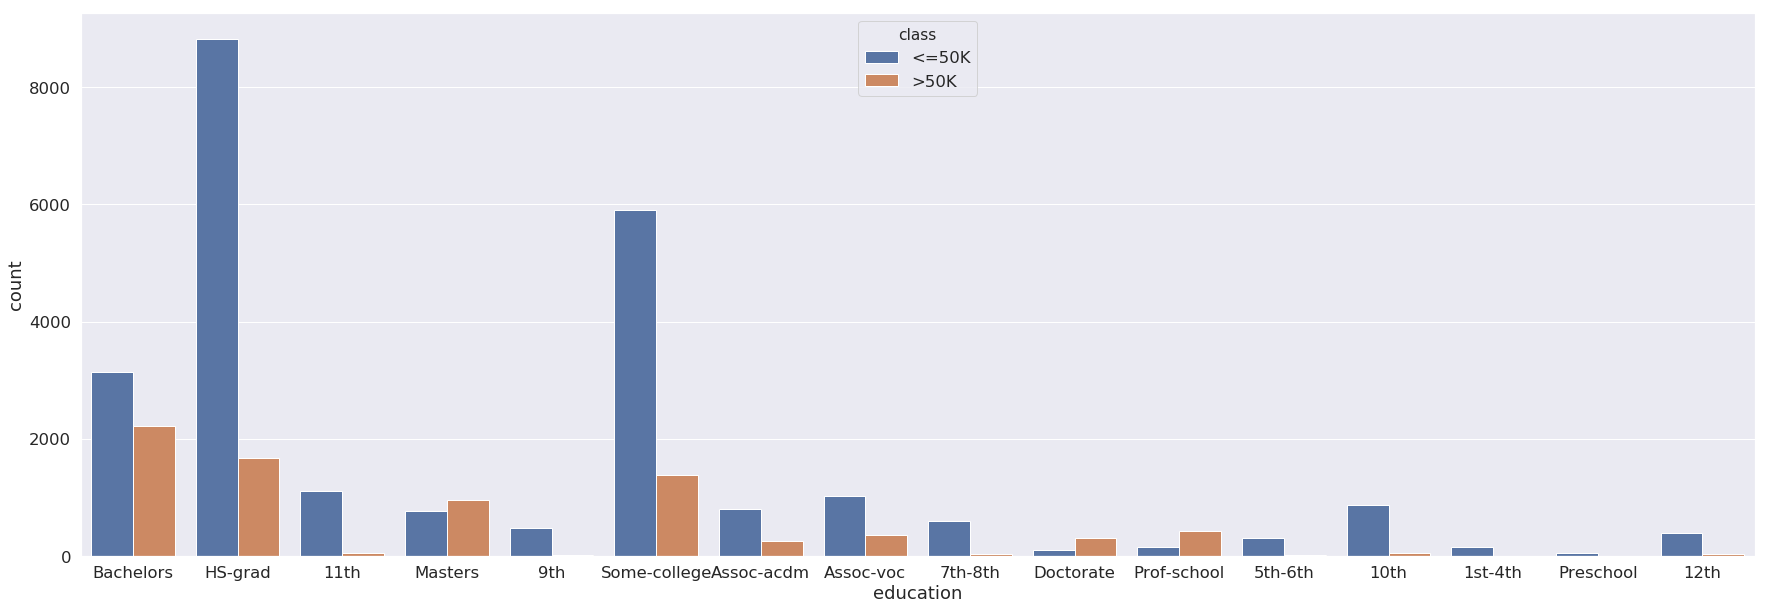

In [132]:
sns.set(font_scale=1.5)
plt.figure(figsize=(30,10))
ax = sns.countplot(x="education", hue="class", data=train_set)

Those with Bachelors degree have higher (>50k) income. 

Text(0,0.5,'Count')

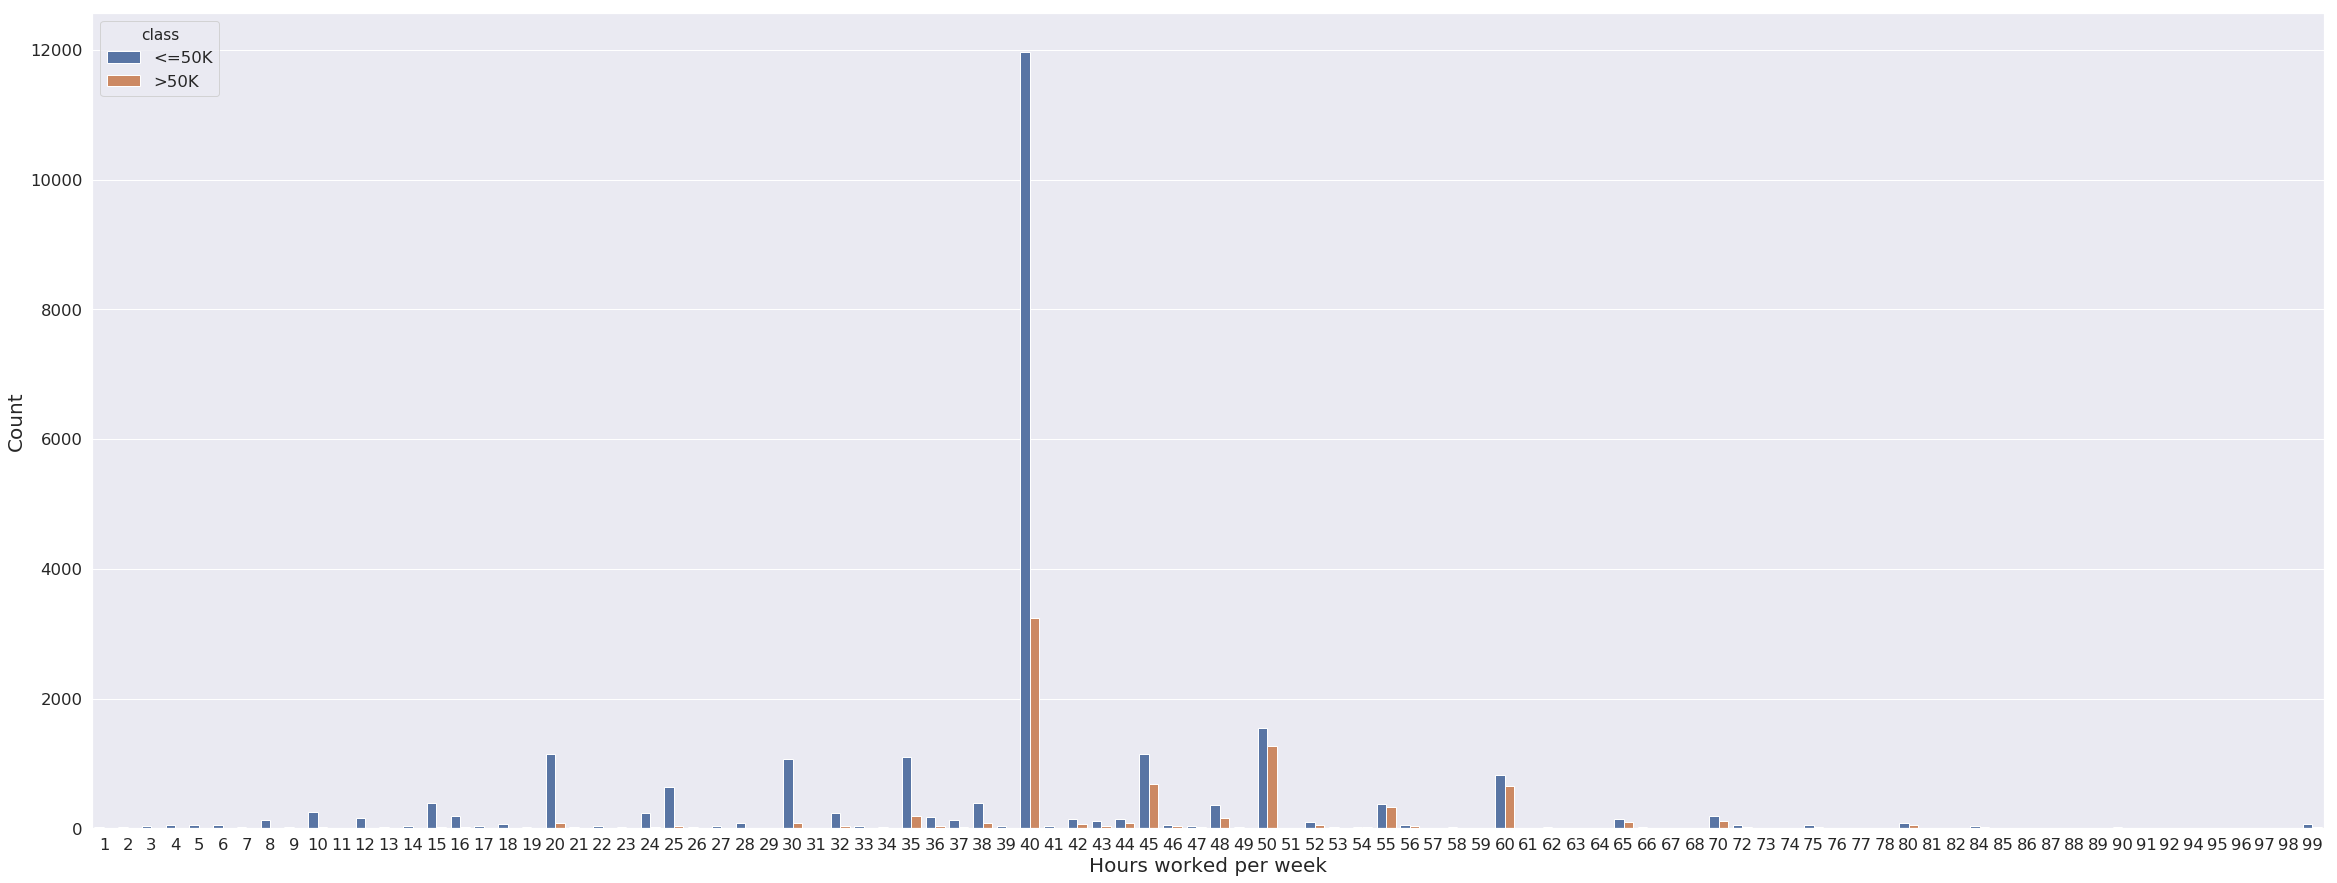

In [142]:
plt.figure(figsize=(40,15))
ax = sns.countplot(x="hours-per-week", hue="class", data=train_set)
ax.set_xlabel('Hours worked per week', fontsize= 20)
ax.set_ylabel('Count', fontsize= 20)

There are some people working more than 40 hours per week and earning <50k. Most of the people are working 40 hours per week.

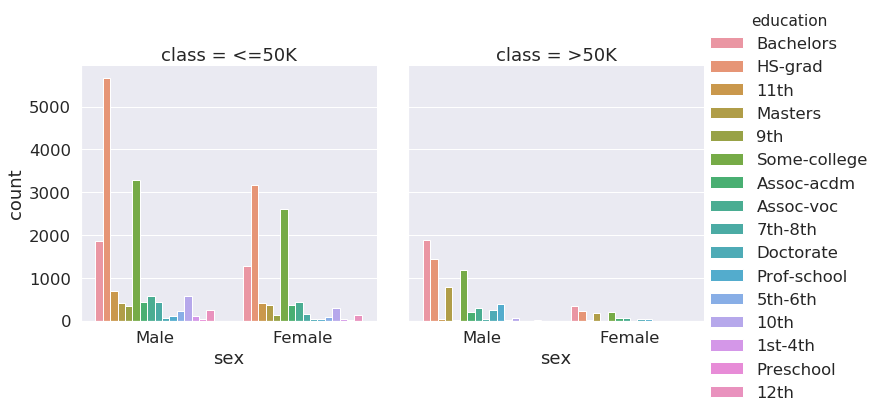

In [33]:
#plt.figure(figsize=(15, 10))
g =sns.catplot(x='sex', hue='education', col= 'class',
               data= train_set, kind='count')
               

Let's look at the ratio of male and female in the data.

Text(0,0.5,'Frequency')

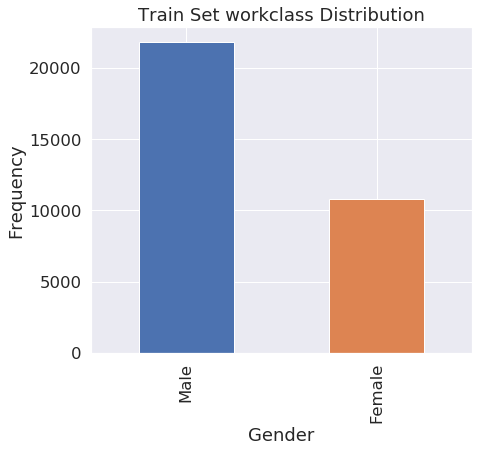

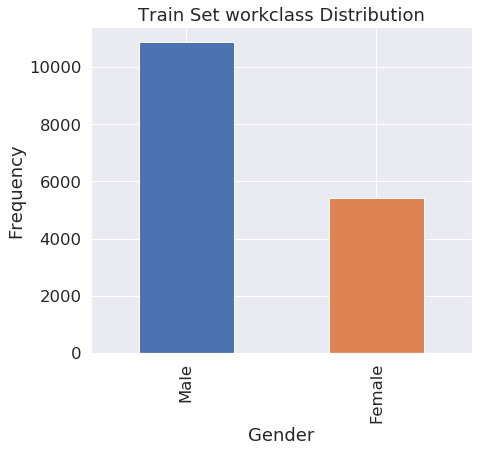

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Train Set workclass Distribution')
pd.value_counts(train_set['sex']).plot.bar()
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.figure(figsize=(15,6))
plt.subplot(122)
plt.title('Train Set workclass Distribution')
pd.value_counts(test_set['sex']).plot.bar()
plt.xlabel('Gender')
plt.ylabel('Frequency')

In both train and test set, the number of males are almost double than female.

##  Check Correlation among numeric variables

Target variable Class is categorical variable which needs to be converted into numeric before checking  the correlations.

In [143]:
# unique values of target variable
train_set['class'].unique()


array(['<=50K', '>50K'], dtype=object)

In [144]:
# For both train and test set, change class into numeric type before checking correlations

train_set['class'] = train_set["class"].map({ '<=50K': 0, '>50K': 1})
test_set['class'] = test_set["class"].map({ '<=50K.': 0, '>50K.': 1})

In [145]:
train_set.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [146]:
test_set.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1


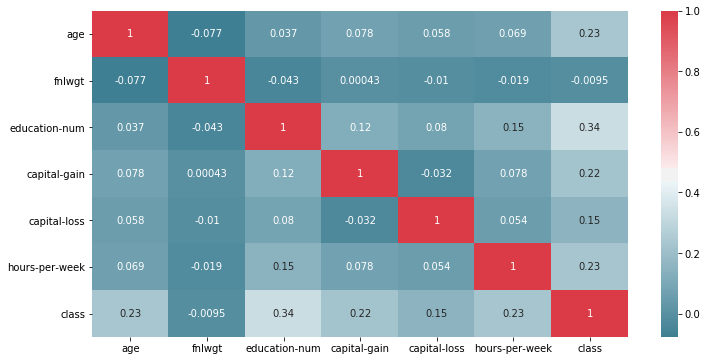

In [13]:
plt.figure(figsize=(12,6))
corr = train_set[train_set.columns].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot = True)


This correlation plot shows that education_num is highly correlated with class. Similarly, capital_gain, age and hours_per_week have pretty high correlation with class, which makes sense.

In [45]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hrs_per_week,class
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [55]:
test_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hrs_per_week,class
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236,0.236226
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332,0.424776
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000,1.000000


In [56]:
train_set.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [116]:
test_set.native_country.value_counts()

United-States         14662
Mexico                  308
?                       274
Others                  166
Latin America           115
Philippines              97
Germany                  69
Canada                   61
India                    51
China                    47
Cuba                     43
England                  37
Dominican-Republic       33
Japan                    30
Portugal                 30
Poland                   27
Jamaica                  25
Guatemala                24
Vietnam                  19
Ecuador                  17
Iran                     16
Nicaragua                15
Peru                     15
Taiwan                   14
Ireland                  13
Thailand                 12
Hong                     10
France                    9
Cambodia                  9
Trinadad&Tobago           8
Honduras                  7
Yugoslavia                7
Hungary                   6
Laos                      5
Name: native_country, dtype: int64

# Data Preprocessing

In [147]:
# transform column names for easy manipulation

train_set=train_set.rename(columns={'education-num':'education_num', 'marital-status': 'marital_status',
                          'capital-gain':'capital_gain', 'capital-loss':'capital_loss',
                  'hours-per-week':'hrs_per_week', 'native-country':'native_country'})


test_set= test_set.rename(columns={'education-num':'education_num', 'marital-status': 'marital_status',
                          'capital-gain':'capital_gain', 'capital-loss':'capital_loss',
                  'hours-per-week':'hrs_per_week', 'native-country':'native_country'})



In [148]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'class'],
      dtype='object')

In [149]:
test_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'class'],
      dtype='object')

# Data preparation for machine learning

## Feature Transformation and Feature Engineering

Since the native_country in the data is mostly  United States, following transformation is being done

In [150]:
train_set['native_country']= train_set['native_country'].replace(['Ecuador','Jamaica','El-Salvador','Cuba','Dominican-Republic',
                                                 'Haiti','Columbia','Guatemala','Nicaragua','Peru','Trinadad&Tobago',
                                                 'Outlying-US(Guam-USVI-etc)','Honduras'], value='Latin America')

test_set['native_country']= test_set['native_country'].replace(['Ecuador',' Jamaica','El-Salvador','Cuba','Dominican-Republic',
                                                 'Haiti','Columbia','Guatemala','Nicaragua','Peru','Trinadad&Tobago',
                                                'Outlying-US(Guam-USVI-etc)','Honduras'], value='Latin America')

train_set['native_country']= train_set['native_country'].replace(to_replace=['Philippines','India','Cambodia',
                                                'China','Hong','Vietnam','Japan','Iran','Taiwan',
                                                'Laos','Thailand' ], value='Asia')
test_set['native_country']= train_set['native_country'].replace(to_replace=['Philippines','India','Cambodia',
                                                'China','Hong','Vietnam','Japan','Iran','Taiwan',
                                                'Laos','Thailand'], value='Asia')


                                                                 
train_set['native_country']= test_set['native_country'].replace(to_replace=['Puerto-Rico','Canada','Germany',
                                                'England','South','Italy','Poland','Portugal','?',
                                                'Greece','France','Ireland','Scotland','Holand-Netherlands',
                                                'Hungary','Yugoslavia'], value='Others')

test_set['native_country']= test_set['native_country'].replace(to_replace=['Puerto-Rico','Canada','Germany',
                                                'England','South','Italy','Poland','Portugal','?',
                                                'Greece','France','Ireland','Scotland','Holand-Netherlands',
                                                'Hungary','Yugoslavia'], value='Others')



In [151]:
print(train_set['native_country'].unique())
print(test_set['native_country'].unique())

['United-States' 'Latin America' 'Asia' 'Others' 'Mexico' nan]
['United-States' 'Latin America' 'Asia' 'Others' 'Mexico']


In order to reduce some of the categories of categorical features, some of the categories can be combined without changing their representation

In [152]:
print(train_set.loc[train_set['native_country']=='nan'])
#(train_set.loc[train_set['native_country']=='Holand-Netherlands'])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hrs_per_week, native_country, class]
Index: []


In [153]:
train_set.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [155]:
train_set['education'] = train_set['education'].replace(('Some-college','Assoc-voc', 'Assoc-acdm','Prof-school','5th-6th','7th-8th','9th','10th','11th','12th','1st-4th','Preschool','Masters','Doctorate'), 
                                                        ('Bachelors','Assoc-deg', 'Assoc-deg','Assoc-deg','Mid-school','Mid-school','HS-dropout','HS-dropout','HS-dropout','HS-dropout','Elementary','Elementary','Grad-school','Grad-school'))

In [157]:
train_set['education'].unique()

array(['Bachelors', 'HS-grad', 'HS-dropout', 'Grad-school', 'Assoc-deg',
       'Mid-school', 'Elementary'], dtype=object)

In [156]:
test_set['education'] = test_set['education'].replace(('HS','Some-college','Assoc-voc', 'Assoc-acdm','Prof-school','5th-6th','7th-8th','9th','10th','11th','12th','1st-4th','Preschool','Masters','Doctorate'), 
                                                        ('HS-grad','Bachelors','Assoc-deg', 'Assoc-deg','Assoc-deg','Mid-school','Mid-school','HS-dropout','HS-dropout','HS-dropout','HS-dropout','Elementary','Elementary','Grad-school','Grad-school'))

In [158]:
test_set['education'].unique()

array(['HS-dropout', 'HS-grad', 'Assoc-deg', 'Bachelors', 'Mid-school',
       'Grad-school', 'Elementary'], dtype=object)

In [159]:
train_set.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

There are significantly more people with Private employment or workclass compared to other groups. 


In [160]:
# reducing 'workclass' categories

train_set['workclass']=train_set['workclass'].replace([ 'Local-gov', 'State-gov', 'Federal-gov'],value='Government')
train_set['workclass']=train_set['workclass'].replace(['Without-pay','Never-worked'],value='Other')

 
test_set['workclass']=test_set['workclass'].replace(['Local-gov', 'State-gov', 'Federal-gov'], value ='Government')
test_set['workclass']=test_set['workclass'].replace(['Without-pay','Never-worked'], value ='Other')

In [161]:
train_set['workclass']=test_set['workclass'].replace('?', value ='Unknown')
test_set['workclass']=test_set['workclass'].replace('?', value ='Unknown')

In [162]:
 train_set['workclass'].unique()

array(['Private', 'Government', 'Unknown', 'Self-emp-not-inc',
       'Self-emp-inc', 'Other', nan], dtype=object)

In [163]:
test_set['workclass'].unique()

array(['Private', 'Government', 'Unknown', 'Self-emp-not-inc',
       'Self-emp-inc', 'Other'], dtype=object)

In [28]:
train_set.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [29]:
train_set.marital_status.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [164]:

train_set['marital_status']= train_set['marital_status'].replace(['Married-civ-spouse','Married-AF-spouse',
                                                                  'Married-spouse-absent'], 'Married')
train_set['marital_status']= train_set['marital_status'].replace(['Never-married','Divorced','Separated', 
                                                                'Widowed',], 'Single')

test_set['marital_status']= test_set['marital_status'].replace(['Married-civ-spouse','Married-AF-spouse',
                                                                'Married-spouse-absent'], 'Married')
test_set['marital_status']= test_set['marital_status'].replace(['Never-married','Divorced','Separated', 
                                                                'Widowed'], 'Single')

In [165]:
train_set['marital_status'].unique()

array(['Single', 'Married'], dtype=object)

In [166]:
test_set['marital_status'].unique()

array(['Single', 'Married'], dtype=object)

In [167]:
train_set.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,39,Private,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Private,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Government,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [168]:
test_set.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,25,Private,226802,HS-dropout,7,Single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Government,336951,Assoc-deg,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1


## One hot encoding
     The data set have 9 categorical variables which needs to be transformed into numerical type before any computation can be done. This can be done using scikit-learn's 'labelencoder' and 'one hot encoding' or pandas get_dummies module.
    Pandas  get_dummies is being used to convert 9 features into numerical variables. For Target class mapper function is used to convert into numeric data type.

In [169]:
# unique values of target variable
train_set['class'].unique()


array([0, 1])

In [170]:
# dropping columns 'Education_num', which is coordinated with 'Education' and 'Relationship' 
# which is related to 'marital_status'

X = train_set.drop(['fnlwgt','education_num', 'relationship'], axis=1, inplace=True)

In [171]:
# separate target class from train set


X = train_set.drop("class", axis=1)
Y = train_set["class"].copy()

In [172]:

X.shape

(32561, 11)

In [173]:
X.head()

,age,workclass,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hrs_per_week,native_country
0,39,Private,Bachelors,Single,Adm-clerical,White,Male,2174,0,40,United-States
1,50,Private,Bachelors,Married,Exec-managerial,White,Male,0,0,13,United-States
2,38,Government,HS-grad,Single,Handlers-cleaners,White,Male,0,0,40,United-States
3,53,Private,HS-dropout,Married,Handlers-cleaners,Black,Male,0,0,40,United-States
4,28,Unknown,Bachelors,Married,Prof-specialty,Black,Female,0,0,40,Latin America


In [174]:
X_train = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X_train.shape

(32561, 39)

## Prepare test set 

In [175]:
# Extract class from test set

x_test = test_set.drop(['fnlwgt',"education_num",'relationship'], axis=1, inplace=True)


In [176]:
x_test = test_set.drop(["class"], axis=1)
y_test = test_set["class"].copy()

In [177]:
x_test.head()

,age,workclass,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hrs_per_week,native_country
0,25,Private,HS-dropout,Single,Machine-op-inspct,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married,Farming-fishing,White,Male,0,0,50,United-States
2,28,Government,Assoc-deg,Married,Protective-serv,White,Male,0,0,40,United-States
3,44,Private,Bachelors,Married,Machine-op-inspct,Black,Male,7688,0,40,United-States
4,18,Unknown,Bachelors,Single,?,White,Female,0,0,30,Latin America


In [178]:
x_test.shape

(16281, 11)

After encoding features of categorical varibles, there is difference in number of columns. It can certainly be assumed that one of the variable has slightly different set of categories compared to train set.

In [179]:
test_x = pd.get_dummies(x_test, prefix_sep='_', drop_first=True)
test_x.shape

(16281, 39)

Prepare results table as pandas dataframe to store the results.


In [84]:

results = pd.DataFrame(columns=['Model', 'Acc_score (test)','Acc_score(train)', 'AUROC (test)', 'Runtime'])

# Build Classification Model

## Support Vector Machine

In [180]:
# import time to anlyze runtime for each classifier
import time


In [181]:

start = time.time()
duration =time.time()-start

from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=42,penalty='l1', C=0.01, dual=False)
svm_clf.fit(X_train, Y)

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=42, tol=0.0001,
     verbose=0)

In [182]:
train_pred = svm_clf.predict(X_train)

test_pred = svm_clf.predict(test_x)

### Evaluate SVM model

In [183]:
accuracy = accuracy_score(y_test, test_pred)
auroc = roc_auc_score(y_test, test_pred)
cm = confusion_matrix(y_test, test_pred).astype(int)

print ('accuracy:', np.round(accuracy,2))
print ('auroc:', np.round(auroc,2))
print(cm)

accuracy: 0.85
auroc: 0.74
[[11691   744]
 [ 1749  2097]]


In [184]:
accuracy_train = accuracy_score(train_pred, Y)
auroc_train = roc_auc_score(Y, train_pred)
cm_train = confusion_matrix(Y, train_pred).astype(int)

print ('accuracy:', np.round(accuracy_train,2))
print ('auroc:', np.round(auroc_train,2))
print(cm_train)

accuracy: 0.84
auroc: 0.74
[[23201  1519]
 [ 3540  4301]]


In [91]:
results.loc[len(results)] = ['SVM (LinearSVC)', np.round(accuracy,2),np.round(accuracy_train,2),np.round(auroc,2), (duration)]

LinearSVC model performed almost the same for test set and train set

In [185]:
# print confusion matrix results

labels=['<=50K', '>50K']
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]
cm2df(cm, labels)

,<=50K,>50K
<=50K,11691,744
>50K,1749,2097


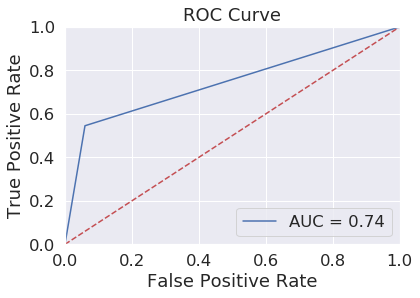

In [186]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, test_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
# check count of each class in test_set for comparision

test_set.groupby(['class']).count()

,age,workclass,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hrs_per_week,native_country
class,,,,,,,,,,,
0,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435
1,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846


## RandomForest Classifier

In [187]:
start = time.time()
duration =time.time()-start

from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier(n_estimators=30, max_depth=9)
rf_clf.fit(X_train,Y)
rf_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Evaluate Random Forest

In [188]:
rf_predtrain= rf_clf.predict(X_train)
rf_acctrain = accuracy_score(rf_predtrain, Y)

cm_rf= confusion_matrix(Y,rf_predtrain).astype(int)
rf_auroctrain = roc_auc_score(Y,rf_predtrain)

print('aacuracy:', np.round(rf_acctrain,2))
print('auroc:', np.round(rf_auroctrain,2))

aacuracy: 0.86
auroc: 0.73


In [189]:

rf_pred = rf_clf.predict(test_x)
rf_acc= accuracy_score(rf_pred, y_test)

cm2= confusion_matrix(y_test, rf_pred).astype(int)
rf_auroc = roc_auc_score(y_test, rf_pred)


print('accuracy:', np.round(rf_acc,2))
print('auroc', np.round(rf_auroc,2))
cm2df(cm2, labels)

accuracy: 0.85
auroc 0.72


,<=50K,>50K
<=50K,12051,384
>50K,2042,1804


In [101]:
results.loc[len(results)] = ['RandomForest', np.round(rf_acc,2),np.round(rf_acctrain,2),np.round(auroc,2), (duration)]

### Auroc curve

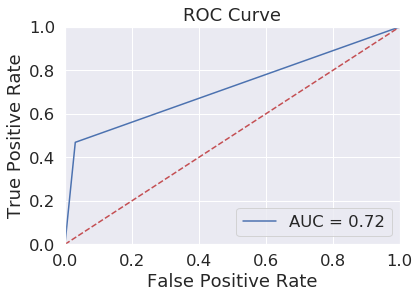

In [190]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression
    Train a logisticRegression classification model

In [109]:
start = time.time()
duration =time.time()-start

model = LogisticRegression()
model.fit(X_train, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
train_pred = model.predict(X_train)
lr_acctrain = accuracy_score(train_pred, Y)

cm_lr= confusion_matrix(Y,train_pred).astype(int)
lr_auroctrain = roc_auc_score(Y,train_pred)

print('aacuracy:', np.round(lr_acctrain,2))
print('auroc:', np.round(lr_auroctrain,2))
cm2df(cm_lr, labels)

aacuracy: 0.85
auroc: 0.76


,<=50K,>50K
<=50K,22947,1773
>50K,3273,4568


In [114]:
y_pred = model.predict(test_x)
test_acc = accuracy_score(y_pred, y_test)

cm_test = confusion_matrix(y_test, y_pred).astype(int)
test_auroc = roc_auc_score(y_test, y_pred)

print('aacuracy:', np.round(test_acc, 2))
print('auroc:', np.round(test_auroc, 2))
cm2df(cm_test, labels)

aacuracy: 0.85
auroc: 0.75


,<=50K,>50K
<=50K,11570,865
>50K,1638,2208


In [127]:
results.loc[len(results)] = ['Logistic Reg.', np.round(test_acc,2),np.round(lr_acctrain,2),np.round(test_auroc,2), (duration)]

### AUROC curve

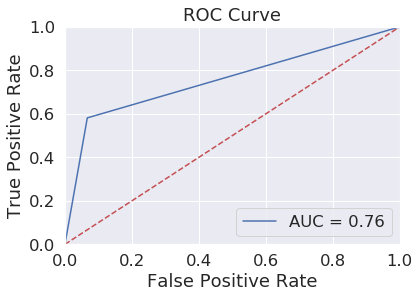

In [255]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Finetune Model via RandomizedSearch

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=3, high=12),
    }

forest_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_train, Y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbb34165a58>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbb341652e8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [117]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([2.52636593e-01, 1.34125327e-01, 4.50121261e-02, 1.22821631e-01,
       6.80762183e-05, 2.03751501e-02, 4.05192952e-03, 7.79259546e-03,
       6.38626009e-03, 1.87841775e-02, 1.39921392e-03, 2.27035668e-02,
       9.84360994e-03, 1.40713232e-02, 6.40148135e-03, 1.48266175e-01,
       6.52230922e-03, 8.66980699e-06, 7.74876612e-03, 2.51053810e-02,
       5.05456983e-03, 3.46555852e-03, 5.10781612e-03, 6.55510264e-03,
       1.55939448e-04, 2.48714878e-02, 4.57132412e-03, 8.97736437e-03,
       5.91716972e-03, 5.89530351e-03, 4.77981836e-03, 6.25487352e-03,
       1.11113828e-03, 9.42806970e-03, 2.44874530e-02, 1.42112197e-03,
       1.51537172e-03, 5.81398975e-03, 2.04921646e-02])

# Feature Selection, Feature Importances

In [118]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [119]:
k = 5
feature_importances

array([2.52636593e-01, 1.34125327e-01, 4.50121261e-02, 1.22821631e-01,
       6.80762183e-05, 2.03751501e-02, 4.05192952e-03, 7.79259546e-03,
       6.38626009e-03, 1.87841775e-02, 1.39921392e-03, 2.27035668e-02,
       9.84360994e-03, 1.40713232e-02, 6.40148135e-03, 1.48266175e-01,
       6.52230922e-03, 8.66980699e-06, 7.74876612e-03, 2.51053810e-02,
       5.05456983e-03, 3.46555852e-03, 5.10781612e-03, 6.55510264e-03,
       1.55939448e-04, 2.48714878e-02, 4.57132412e-03, 8.97736437e-03,
       5.91716972e-03, 5.89530351e-03, 4.77981836e-03, 6.25487352e-03,
       1.11113828e-03, 9.42806970e-03, 2.44874530e-02, 1.42112197e-03,
       1.51537172e-03, 5.81398975e-03, 2.04921646e-02])

In [120]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  2,  3, 15])

In [121]:
attributes = X_train.columns
np.array(attributes)[top_k_feature_indices]

array(['age', 'capital_gain', 'capital_loss', 'hrs_per_week',
       'marital_status_Single'], dtype=object)

In [122]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.252636592911086, 'age'),
 (0.14826617468443162, 'marital_status_Single'),
 (0.13412532747768208, 'capital_gain'),
 (0.12282163146577514, 'hrs_per_week'),
 (0.04501212605486899, 'capital_loss')]

In [123]:
from sklearn.feature_selection import SelectFromModel

rnd_clf =RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train,Y)


sfm = SelectFromModel(rnd_clf, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', 
      X_selected.shape[0])

Number of samples that meet this criterion: 32561


In [124]:
labels= X_train.columns
importances = rnd_clf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            labels[indices[f]], 
                            importances[indices[f]]))

 1) age                            0.271018
 2) marital_status_Single          0.136621
 3) hrs_per_week                   0.136251
 4) capital_gain                   0.123050


These Features are selected as important features for the problem.

Top 5 features selected from RandomizedSearch matches with those of RandomForestClassifier. 

# Result

In [128]:
results

,Model,Acc_score (test),Acc_score(train),AUROC (test),Runtime
0,SVM (LinearSVC),0.85,0.84,0.74,0.000041
1,RandomForest,0.86,0.86,0.74,0.000038
2,RandomForest,0.85,0.85,0.75,0.000036
3,Logistic Reg.,0.85,0.85,0.75,0.000036


All three tested models performed in similar way. With the calculated  Confusion matrix scores of TN, FP, TP and FN and given data structure class is most likely to be <=50K. Age, capital_gain, hrs_per week are among the important variables which makes sense.
The accuracy scores of both train and test set are close to each other which suggest that there is no overfitting.

As observed in the training data set, the models have predicted that it is likely that there are more people or data points with income class < 50k than >50k.
